In [1]:
import numpy as np
np.random.seed(2)
import tensorflow as tf
tf.random.set_seed(2)

In [2]:
def main(test_type):
    import pandas as pd 
    import numpy as np 
    import matplotlib.pyplot as plt

    from sklearn.preprocessing import StandardScaler 
    from imblearn.over_sampling import SMOTE

    df = pd.read_csv('risk_factors_cervical_cancer.csv')
    df = df.replace('?', np.nan)
    df = df.astype(float)
    df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis = 1)

    test_list = ['Dx:Cancer', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
    test_list.remove(test_type)
    
    x = df.drop(test_list, axis = 1)
    y = df['Dx:Cancer']

    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
    from impyute.imputation.cs import em
    x_train = em(x_train)
    x_test = em(x_test)
    
    rs = SMOTE()
    x_train , y_train = rs.fit_resample(x_train, y_train)
    x_test , y_test = rs.fit_resample(x_test, y_test)
    
    print(np.unique(y_train, return_counts = True))
    print(np.unique(y_test, return_counts = True))
    
    
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    classifier = classifier.fit(x_train, y_train)

    r_probs = [0 for _ in range(len(y_test))]
    y_pred = classifier.predict(x_test)
    
  
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_curve, roc_auc_score
    
    rc = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    r_auc = roc_auc_score(y_test, r_probs)
    rf_auc = roc_auc_score(y_test, y_pred)
    
    r_fpr,r_tpr,r_threshold = roc_curve(y_test, r_probs)
    rf_fpr,rf_tpr,rf_threshold = roc_curve(y_test, y_pred)
    
    
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
    plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
    print(cm)
    
    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    print('Recall score =',rc)
    plt.grid()
    plt.savefig(f"{test_type}.svg", format="svg")

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


(array([0., 1.]), array([589, 589]))
(array([0., 1.]), array([251, 251]))
[[251   0]
 [ 20 231]]
Recall score = 0.9203187250996016


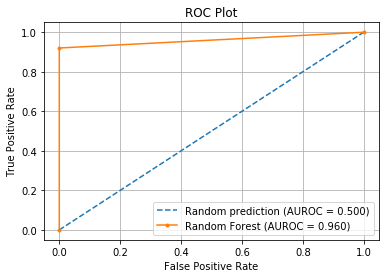

In [4]:
main('Hinselmann')

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


(array([0., 1.]), array([589, 589]))
(array([0., 1.]), array([251, 251]))
[[251   0]
 [  7 244]]
Recall score = 0.9721115537848606


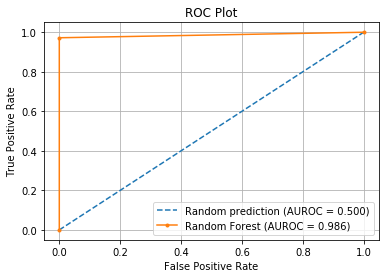

In [5]:
main('Schiller')

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


(array([0., 1.]), array([589, 589]))
(array([0., 1.]), array([251, 251]))
[[251   0]
 [ 22 229]]
Recall score = 0.9123505976095617


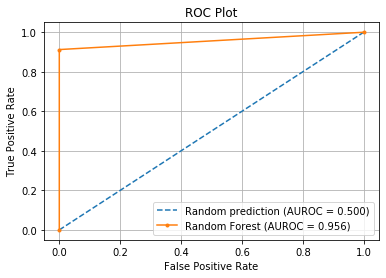

In [6]:
main('Citology')

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


(array([0., 1.]), array([589, 589]))
(array([0., 1.]), array([251, 251]))
[[251   0]
 [  1 250]]
Recall score = 0.9960159362549801


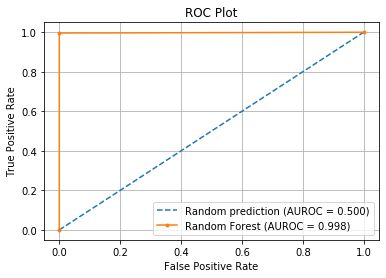

In [7]:
main('Biopsy')